In [1]:
import sklearn
import imblearn
from sklearn import datasets
import pandas as pd
import numpy as np
from numpy import radians, sin, cos, sqrt , arctan2
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
train = pd.read_csv('Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv' , index_col='Unnamed: 0')
train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
test = pd.read_csv('Credit Card Transactions Fraud Detection Dataset/fraudTest.csv' , index_col='Unnamed: 0')
test

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [4]:
# Check the shape of the data
train.shape


(1296675, 22)

In [5]:
test.shape

(555719, 22)

In [6]:
# Check the data types
train.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

Exploratory Data Analysis

In [7]:
# Check the distribution of the target variable
train.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

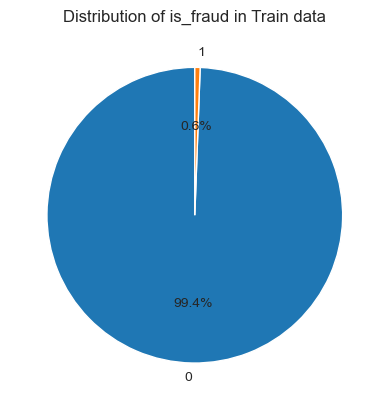

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [8]:
from matplotlib import pyplot as plt

value_counts = train['is_fraud'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of is_fraud in Train data')
plt.show()
print(value_counts)

In [9]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
train = pd.get_dummies(train, columns = ['category', 'gender'], prefix = ['category', 'gender'])
test = pd.get_dummies(test, columns = ['category', 'gender'], prefix = ['category', 'gender'])

In [11]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M'],
      dtype='object')

In [12]:
train

,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,zip,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,28654,...,False,False,True,False,False,False,False,False,True,False
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,99160,...,False,False,False,False,False,False,False,False,True,False
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,83252,...,False,False,False,False,False,False,False,False,False,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,False,False,False,False,False,False,False,False,False,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,24433,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,Erik,Patterson,162 Jessica Row Apt. 072,Hatch,UT,84735,...,False,False,False,False,False,False,False,False,False,True
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,Jeffrey,White,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,...,False,False,False,False,False,False,False,False,False,True
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,Christopher,Castaneda,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,...,False,False,False,False,False,False,False,False,False,True
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,Joseph,Murray,42933 Ryan Underpass,Manderson,SD,57756,...,False,False,False,False,False,False,False,False,False,True


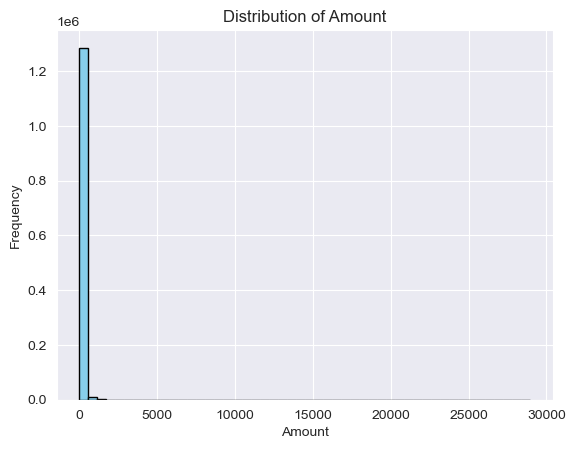

In [13]:
plt.hist(train['amt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

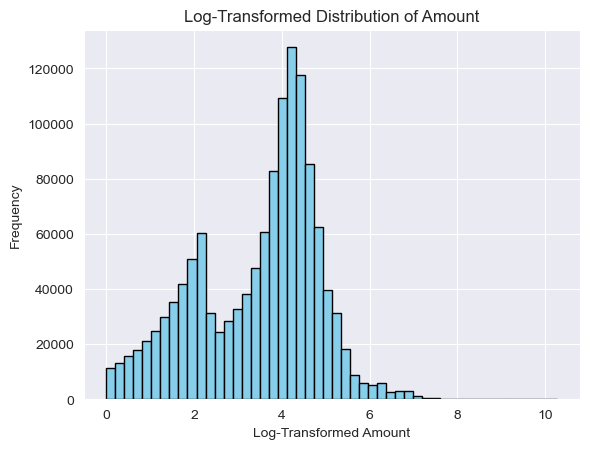

In [14]:
# Log Transformation
train['log_amt'] = np.log(train['amt'])
test['log_amt'] = np.log(test['amt'])
plt.hist(train['log_amt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Log-Transformed Amount')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Amount')
plt.show()

In [15]:
def haversine(lat1, lon1, lat2, lon2):
    # Haversine formula for calculating distances between coordinates
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    distance = 2 * R * arctan2(sqrt(a), sqrt(1 - a))
    return distance

# Apply Haversine function to create the "Distance" column
train['distanceInKM'] = train.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
test['distanceInKM'] = test.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


 Apply sine and cosine transformations on transaction date and time to capture cyclical patterns of the days in a week.

In [16]:
train['trans_datetime'] = pd.to_datetime(train['trans_date_trans_time'])
train['DayOfWeek'] = train['trans_datetime'].dt.dayofweek  # 0 to 6
train['DayOfWeekSin'] = np.sin(2 * np.pi * train['DayOfWeek'] / 7)
train['DayOfWeekCos'] = np.cos(2 * np.pi * train['DayOfWeek'] / 7)

In [17]:
test['trans_datetime'] = pd.to_datetime(test['trans_date_trans_time'])
test['DayOfWeek'] = test['trans_datetime'].dt.dayofweek  # 0 to 6
test['DayOfWeekSin'] = np.sin(2 * np.pi * test['DayOfWeek'] / 7)
test['DayOfWeekCos'] = np.cos(2 * np.pi * test['DayOfWeek'] / 7)

 This step involves extracting the day of the week from the transaction date and time, and then applying sine and cosine transformations to capture cyclical patterns of the days in a week

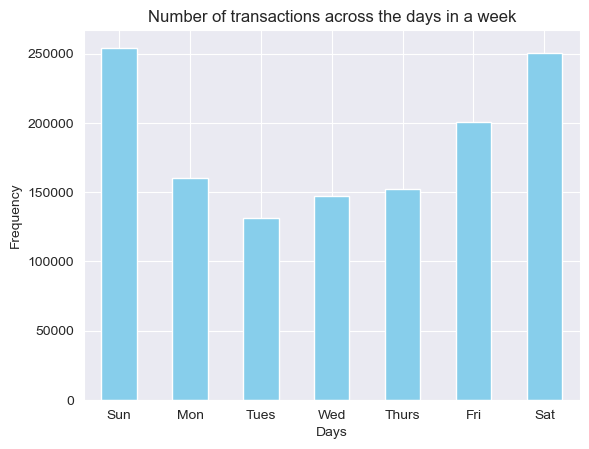

In [18]:
value_counts = train['DayOfWeek'].value_counts().sort_index()
value_counts.plot(kind='bar', color='skyblue')
plt.title('Number of transactions across the days in a week')
plt.ylabel('Frequency')
plt.xlabel('Days')

plt.xticks(value_counts.index, ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'], rotation=0)

plt.show()

    Extract the age of the cardholder from the date of birth and transaction date and time

In [19]:
train['dob'] = pd.to_datetime(train['dob'])
train['age'] = np.ceil((train['trans_datetime'] - train['dob']).dt.days / 365).astype(int)

In [20]:
test['dob'] = pd.to_datetime(test['dob'])
test['age'] = np.ceil((test['trans_datetime'] - test['dob']).dt.days / 365).astype(int)

In [21]:
# Verify
print(train[['dob', 'trans_datetime', 'age']].head())

         dob      trans_datetime  age
0 1988-03-09 2019-01-01 00:00:18   31
1 1978-06-21 2019-01-01 00:00:44   41
2 1962-01-19 2019-01-01 00:00:51   57
3 1967-01-12 2019-01-01 00:01:16   53
4 1986-03-28 2019-01-01 00:03:06   33


In [22]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_trans_time    555719 non-null  object        
 1   cc_num                   555719 non-null  int64         
 2   merchant                 555719 non-null  object        
 3   amt                      555719 non-null  float64       
 4   first                    555719 non-null  object        
 5   last                     555719 non-null  object        
 6   street                   555719 non-null  object        
 7   city                     555719 non-null  object        
 8   state                    555719 non-null  object        
 9   zip                      555719 non-null  int64         
 10  lat                      555719 non-null  float64       
 11  long                     555719 non-null  float64       
 12  city_pop             

In [23]:
# Drop unnecessary columns

category_columns = train.filter(like='category_', axis=1).astype(int)
gender_columns = train.filter(like='gender_', axis=1).astype(int)
X_train = pd.concat([train[['city_pop', 'log_amt', 'DayOfWeekSin', 'DayOfWeekCos', 'age', 'distanceInKM']], category_columns, gender_columns], axis=1)
y_train = train['is_fraud']

category_columns = test.filter(like='category_', axis=1).astype(int)
gender_columns = test.filter(like='gender_', axis=1).astype(int)
X_test = pd.concat([test[['city_pop', 'log_amt', 'DayOfWeekSin', 'DayOfWeekCos', 'age', 'distanceInKM']], category_columns, gender_columns], axis=1)
y_test = test['is_fraud']

In [24]:
# Verify
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   city_pop                 1296675 non-null  int64  
 1   log_amt                  1296675 non-null  float64
 2   DayOfWeekSin             1296675 non-null  float64
 3   DayOfWeekCos             1296675 non-null  float64
 4   age                      1296675 non-null  int32  
 5   distanceInKM             1296675 non-null  float64
 6   category_entertainment   1296675 non-null  int32  
 7   category_food_dining     1296675 non-null  int32  
 8   category_gas_transport   1296675 non-null  int32  
 9   category_grocery_net     1296675 non-null  int32  
 10  category_grocery_pos     1296675 non-null  int32  
 11  category_health_fitness  1296675 non-null  int32  
 12  category_home            1296675 non-null  int32  
 13  category_kids_pets       1296675 non-null  int3

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

C:\Users\Lenovo\anaconda3\envs\credit_fraud_detection\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9961401355721147
Confusion Matrix:
[[553574      0]
 [  2145      0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719


C:\Users\Lenovo\anaconda3\envs\credit_fraud_detection\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\envs\credit_fraud_detection\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    The accuracy of the model is 0.996, which is very high. However, the model is not able to detect any fraudulent transactions. This is because the data is highly imbalanced. The number of non-fraudulent transactions is much higher than the number of fraudulent transactions. Therefore, the model is biased towards the majority class. 
    Note: The warning about precision and F-score being ill-defined is due to the fact that the logistic regression model predicts only the majority class (0) for all instances. Therefore, the precision and F-score for the minority class (1) are undefined.

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)